In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Explore the Dataset

In [184]:
# Import .csv file
foodFactData = pd.read_csv('./Data/FoodFacts.csv',low_memory=False);
print(foodFactData.shape);

(65503, 159)


#### Number of rows : 65502 (no. of products)
#### Number of colums: 159 (attributes)
Dataset link : https://www.kaggle.com/openfoodfacts/world-food-facts/downloads/world-food-facts-release-2016-01-13-03-19-37.zip

In [187]:
# Check the name of the column labels
foodFactData.columns.values

array(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity', 'packaging', 'packaging_tags', 'brands',
       'brands_tags', 'categories', 'categories_tags', 'categories_en',
       'origins', 'origins_tags', 'manufacturing_places',
       'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_en',
       'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities',
       'cities_tags', 'purchase_places', 'stores', 'countries',
       'countries_tags', 'countries_en', 'ingredients_text', 'allergens',
       'allergens_en', 'traces', 'traces_tags', 'traces_en',
       'serving_size', 'no_nutriments', 'additives_n', 'additives',
       'additives_tags', 'additives_en', 'ingredients_from_palm_oil_n',
       'ingredients_from_palm_oil', 'ingredients_from_palm_oil_tags',
       'ingredients_that_may_be_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil',
   

In [222]:
# Check the datatypes of the column labels
# foodFactData.dtypes

## First let explore data using 'countries' attribute

##### Unique countries in data

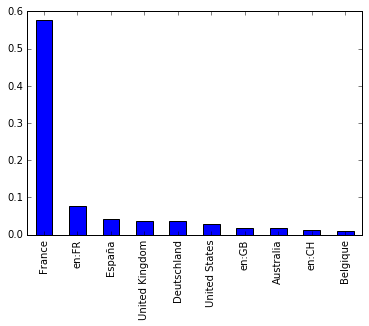

In [98]:
# Now plot the frequencies of the country in dataset
plt.figure()
foodFactData.countries.value_counts(normalize=True).head(10).plot(kind='bar')

<p style=" text:bold; font-size:16px">As we observe that *France* and *en:FR* both are same , one is country name and other seems to be code or shortened name so we need to change en:FR to France to remove such duplicacy.<br />
Similarly we change in some more data which occur frequently *us* to *united states* , *holland* to *netherlands* etc.<p>

In [189]:
foodFactData.countries=foodFactData.countries.str.lower()
foodFactData.loc[foodFactData['countries'] == 'en:fr', 'countries'] = 'france'
foodFactData.loc[foodFactData['countries'] == 'en:es', 'countries'] = 'spain'
foodFactData.loc[foodFactData['countries'] == 'en:gb', 'countries']='united kingdom'
foodFactData.loc[foodFactData['countries'] == 'en:uk', 'countries']='united kingdom'
foodFactData.loc[foodFactData['countries'] == 'holland','countries']='netherlands'
foodFactData.loc[foodFactData['countries'] == 'españa','countries']='spain'
foodFactData.loc[foodFactData['countries'] == 'us','countries']='united states'
foodFactData.loc[foodFactData['countries'] == 'en:us','countries']='united states'
foodFactData.loc[foodFactData['countries'] == 'usa','countries']='united states'
foodFactData.loc[foodFactData['countries'] == 'en:cn','countries']='canada'
foodFactData.loc[foodFactData['countries'] == 'en:au','countries']='australia'
foodFactData.loc[foodFactData['countries'] == 'en:de','countries']='germany'
foodFactData.loc[foodFactData['countries'] == 'deutschland','countries']='germany'
foodFactData.loc[foodFactData['countries'] == 'en:cn','countries']='china'
foodFactData.loc[foodFactData['countries'] == 'en:be','countries']='belgium'
foodFactData.loc[foodFactData['countries'] == 'en:ch','countries']='switzerland'

In [190]:
# For better visualization purpose , import seaborn library
import seaborn as sns

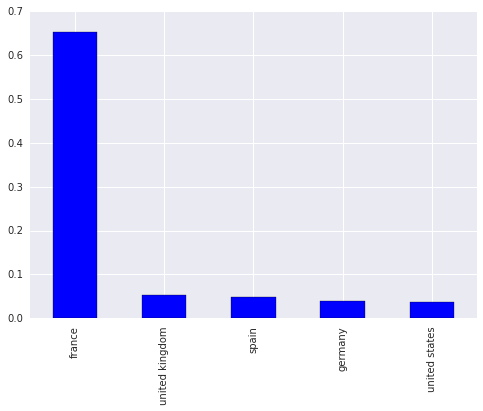

In [191]:
fig=plt.figure()
ax1 = fig.add_subplot(1,1,1)
# Now plot possibly top five countries in this dataset
foodFactData.countries.value_counts(normalize=True).head().plot(kind='bar')

In [192]:
foodFactData[foodFactData['countries'] == 'france'].countries.value_counts()

france    42767
Name: countries, dtype: int64

##### Majority of the Product in this data sold in France 

In [195]:
# Create a backUp Data Frame
foodFactDataBackUp = foodFactData

## Explore other attributes 

### Order of top 5 countries in consuming Fruits and Vegetables 

In [193]:
top_countries = ['france','united kingdom','spain','germany','united states' ]
fruits_vegetables_nuts=[]
# Loop through all top five countries 
for country in top_countries:
    fruits_vegetables_nuts.append(getattr(foodFactData[foodFactData.countries==country], 'fruits_vegetables_nuts_100g').mean())

In [ ]:
# We can combine two lists to form a Data Frame
# countriesDF=pd.DataFrame(dict(country=pd.Series(top_countries),mean=pd.Series(fruits_vegetables_nuts)))

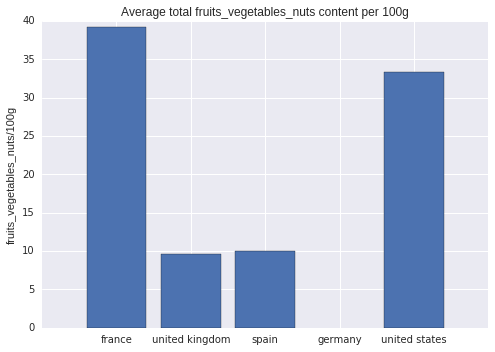

In [214]:
fig=plt.figure()
ax1 = fig.add_subplot(1,1,1)
y_pos = np.arange(len(top_countries))
    
plt.bar(y_pos,fruits_vegetables_nuts, align='center')
plt.title('Average total fruits_vegetables_nuts content per 100g')
plt.xticks(y_pos, top_countries)
plt.ylabel('fruits_vegetables_nuts/100g') 
plt.show()

### Order of top 5 countries in consuming Alcohol

In [217]:
alcohol=[]
# Loop through all top five countries 
for country in top_countries:
    alcohol.append(getattr(foodFactData[foodFactData.countries==country], 'alcohol_100g').mean())

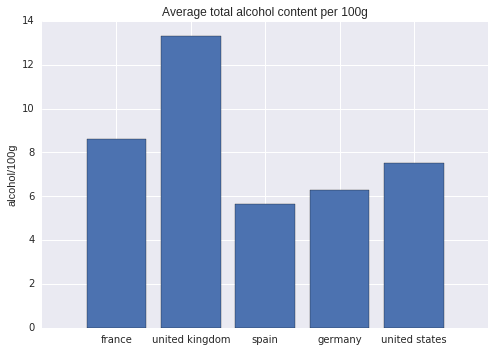

In [220]:
plt.bar(y_pos,alcohol, align='center')
plt.title('Average total alcohol content per 100g')
plt.xticks(y_pos, top_countries)
plt.ylabel('alcohol/100g')    
plt.show()